#### Clustering: Clustering is similar to classification, but the basis is different. In Clustering you don’t know what you are looking for, and you are trying to identify some segments or clusters in your data. When you use clustering algorithms on your dataset, unexpected things can suddenly pop up like structures, clusters and groupings you would have never thought of otherwise.

##### K means clustering: Allows you to cluster your data or categorical your data.
1. Identify certain groups of similar items. 
2. What K mean does, it identify the similar data points and categorize
3. There are may be many more clusters present.

#### Step by step process:
1. Choose  the number of clusters K
2. Select at random K points, the centroids (not necessarily from your dataset)
3. Assign each data points to the closet centroid, This forms K cluster. (distance calculate using euclidean distance)
4. compute and place the new centroid of each cluster.
5. Reassign each data point to the new closest centroid. If any reassignment took place go to step 4 else end of algo (model is ready)

##### Random Initialization Trap
1. If we choose 3 cluster (k=3) at the end we got the result
2. What if we select centroids at random place, then how the cluster will happen
3. What happen if we had a bad random initialization.
4. The solution is K means ++ (it is involve approach how clustering happens, it involves in background), dont need to implement.
5. K means ++ algorithm to avoid random initialize problem.

##### Choosing the right number of clusters
1. The metrics which help to choose number of clusters is WCSS: with cluster sum of squares
2. We have as many as clusters equals to point have
3. Then wcss equate to zero because every point has own cluster.
4. Less wscc, high goodness of fit.
5. Elbow method to represent WCSS and number of clusters.
6. It represent optimal number of cluster.

##### Steps to implement K means:
1. Import libraries
2. Import dataset
3. Using elbow method to find the optimal number of clusters
4. Training the K means model on dataset
5. Visualize the clusters

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset = pd.read_csv("Mall_Customers.csv")

In [6]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
# There is not dependent variable while doing clustering
# specially k means, identfy patterns using features
# Customer Id is totaly irrevelent
# This problem represent 2D with two features
# below is the matrix of feature
x = dataset.iloc[:, [3,4]].values

In [8]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [15]:
# Using elbow method to find the optimal number of clusters
# Use WCSS
# we will running k means several times each time with different clusters
# import K means from sklearn.cluster
from sklearn.cluster import KMeans
# Now for loop which run the k means algo with 10 different number of clusters
# every time compute WCSS
# x axis: different number of cluster
# y axis: wcss values for every cluster valyue
wcss = []
for i in range(1,11):
    # create K means object
    # init by doing this we are safe from random initialization
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    # append kmeans inertia_: give values of wcss 
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30241.34361793659,
 25336.946861471864,
 21850.165282585633,
 19634.55462934998]

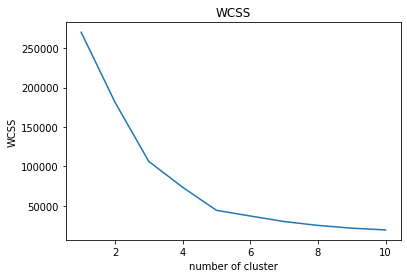

In [21]:
plt.plot(range(1,11), wcss)
plt.title("WCSS")
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [24]:
# Training the k means model on the dataset
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_pred = kmeans.fit_predict(x)

In [26]:
print(y_pred)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


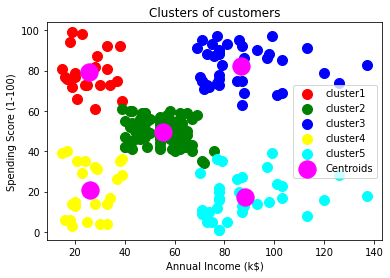

In [37]:
# Visualize the clusters in scatter plot
plt.scatter(x[y_pred == 0,0], x[y_pred == 0, 1], s=100, c='red', label='cluster1')
plt.scatter(x[y_pred == 1,0], x[y_pred == 1, 1], s=100, c='green', label='cluster2')
plt.scatter(x[y_pred == 2,0], x[y_pred == 2, 1], s=100, c='blue', label='cluster3')
plt.scatter(x[y_pred == 3,0], x[y_pred == 3, 1], s=100, c='yellow', label='cluster4')
plt.scatter(x[y_pred == 4,0], x[y_pred == 4, 1], s=100, c='cyan', label='cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'magenta', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()